In [43]:
import pyfits
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
from galpy.util import bovy_coords
from galpy.util import bovy_plot
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import seaborn as sns
from StringIO import StringIO
from astropy.modeling import models, fitting
import pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
with open('counts_vert_AthroughF_10bins_wext.sav','rb') as savefile:
    all_counts= pickle.load(savefile)
    all_counts_unc= pickle.load(savefile)
    all_effvol= pickle.load(savefile)
all_counts= all_counts[:,:,0]
all_counts_unc= all_counts_unc[:,:,0]
all_effvol= all_effvol[:,:,0]

In [45]:
zbins= np.arange(-0.4125,0.425,0.025)
zcen=np.arange(-0.4,0.425,0.025)

In [46]:
print ' N zbins, cen, counts=',len(zbins),len(zcen),len(all_counts[2,:])

 N zbins, cen, counts= 34 33 33


In [62]:
ii=1 # F star
print 'zbins=',zbins
print 'zcen=',zcen
print 'all_conts=',all_counts[ii,:]*1.0e-9

zbins= [-0.4125 -0.3875 -0.3625 -0.3375 -0.3125 -0.2875 -0.2625 -0.2375 -0.2125
 -0.1875 -0.1625 -0.1375 -0.1125 -0.0875 -0.0625 -0.0375 -0.0125  0.0125
  0.0375  0.0625  0.0875  0.1125  0.1375  0.1625  0.1875  0.2125  0.2375
  0.2625  0.2875  0.3125  0.3375  0.3625  0.3875  0.4125]
zcen= [ -4.00000000e-01  -3.75000000e-01  -3.50000000e-01  -3.25000000e-01
  -3.00000000e-01  -2.75000000e-01  -2.50000000e-01  -2.25000000e-01
  -2.00000000e-01  -1.75000000e-01  -1.50000000e-01  -1.25000000e-01
  -1.00000000e-01  -7.50000000e-02  -5.00000000e-02  -2.50000000e-02
   3.33066907e-16   2.50000000e-02   5.00000000e-02   7.50000000e-02
   1.00000000e-01   1.25000000e-01   1.50000000e-01   1.75000000e-01
   2.00000000e-01   2.25000000e-01   2.50000000e-01   2.75000000e-01
   3.00000000e-01   3.25000000e-01   3.50000000e-01   3.75000000e-01
   4.00000000e-01]
all_conts= [ 0.00024865  0.00027095  0.00030687  0.00031754  0.00035981  0.00041121
  0.00043823  0.00054571  0.00060936  0.00073626  0.000

<Container object of 3 artists>

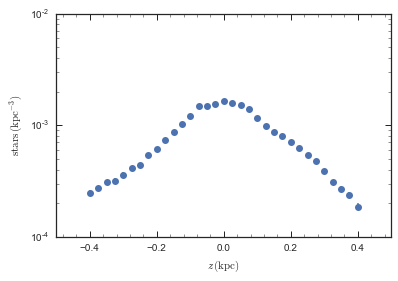

In [64]:
bovy_plot.bovy_plot(zcen,all_counts[ii,:]*1.0e-9,'o',
                    xrange=[np.amin(zcen)-0.1,np.amax(zcen)+0.1],
                    yrange=[1.0e-4,1.0e-2],semilogy=True,
                    xlabel=r'$z\,(\mathrm{kpc})$',
                    ylabel=r'$\mathrm{stars}\,(\mathrm{kpc}^{-3})$')
plt.errorbar(zcen,all_counts[ii,:]*1.0e-9,yerr=all_counts_unc[ii,:]*1.0e-9,marker='None',ls='None')

In [65]:
good_maxxy= 0.2 # for F stars (see Jo's email)
c= all_counts[ii]
ec= all_counts_unc[ii]
raw= c*all_effvol[ii] # recover the raw counts
ef= all_effvol[ii]/(good_maxxy**2.*np.pi*(zbins[1]-zbins[0])) # this is the effective completeness
good_dens_indx= (ef > 0.03*np.nanmax(ef))*(c > 0.)*((ef == ef[len(ef)//2])+(ef > 10.**-5.))*(raw > 4.)

In [66]:
print ' good dens N and zcen=',len(zcen[good_dens_indx]),zcen[good_dens_indx]
print ' density=',all_counts[ii]*1.0e-9

 good dens N and zcen= 33 [ -4.00000000e-01  -3.75000000e-01  -3.50000000e-01  -3.25000000e-01
  -3.00000000e-01  -2.75000000e-01  -2.50000000e-01  -2.25000000e-01
  -2.00000000e-01  -1.75000000e-01  -1.50000000e-01  -1.25000000e-01
  -1.00000000e-01  -7.50000000e-02  -5.00000000e-02  -2.50000000e-02
   3.33066907e-16   2.50000000e-02   5.00000000e-02   7.50000000e-02
   1.00000000e-01   1.25000000e-01   1.50000000e-01   1.75000000e-01
   2.00000000e-01   2.25000000e-01   2.50000000e-01   2.75000000e-01
   3.00000000e-01   3.25000000e-01   3.50000000e-01   3.75000000e-01
   4.00000000e-01]
 density= [ 0.00024865  0.00027095  0.00030687  0.00031754  0.00035981  0.00041121
  0.00043823  0.00054571  0.00060936  0.00073626  0.00087547  0.00102178
  0.0012104   0.0014982   0.00148869  0.00156003  0.00164187  0.00157866
  0.00151065  0.00139479  0.00116509  0.00097409  0.00087708  0.00080708
  0.00070003  0.00062173  0.00053718  0.0004785   0.00038727  0.00030937
  0.00027088  0.00023797  0.

<Container object of 3 artists>

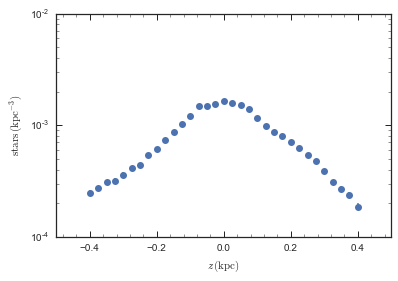

In [69]:
bovy_plot.bovy_plot(zcen[good_dens_indx],all_counts[ii,good_dens_indx]*1.0e-9,'o',
                    xrange=[np.amin(zcen)-0.1,np.amax(zcen)+0.1],
                    yrange=[1.0e-4,1.0e-2],semilogy=True,
                    xlabel=r'$z\,(\mathrm{kpc})$',
                    ylabel=r'$\mathrm{stars}\,(\mathrm{kpc}^{-3})$')
plt.errorbar(zcen,all_counts[ii,good_dens_indx]*1.0e-9,yerr=all_counts_unc[ii,good_dens_indx]*1.0e-9,marker='None',ls='None')